# Reinforcement Learning Homework 1 : Dynamic Programming and Reinforcement Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Dynamic programming

In [48]:
transitions = np.array([[[0.55, 0.45, 0], [0.3, 0.7, 0  ], [1, 0, 0]], 
                        [[1,    0,    0], [0,   0.4, 0.6], [0, 1, 0]], 
                        [[0,    1,    0], [0,   0.6, 0.4], [0, 0, 1]]])
reward = np.array([[0, 0, 5/100], 
                   [0, 0, 0    ], 
                   [0, 1, 9/10 ]])

gamma = 0.95

def bellman_optimal(value):
    return np.max(reward + gamma * np.sum(transitions * value, axis=2), axis=1)

def bellman(value, policy):
    return (reward + gamma * np.sum(transitions * value, axis=2))[policy.reshape(-1, 1)]
   
    
def value_iteration(tol=0.01, output=True):
    value_0 = value = np.random.rand(3)
    value_next = bellman_optimal(value_0)
    
    values = [value_0]
    
    while np.linalg.norm(value_next - value) > tol:
        value = value_next
        value_next = bellman_optimal(value)
        values.append(value_next)
       
    
    
    optimal_policy = np.argmax(reward + gamma * np.sum(transitions * value_next, axis=2), axis=1)
    
    if output:
        index = np.arange(0, len(np.sqrt(np.sum(np.abs(np.array(values) - value_next)**2, axis=1))))
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(index, np.max(np.abs(np.array(values) - value_next), axis=1), label="Distance to optimum")
        ax.plot(index , gamma**index * np.max(np.abs(value_0 - value_next)), label="Theoretical upper bound")
        ax.legend()
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Norm of distance to optimum')
        plt.savefig('value_iteration.pdf')
        print("Optimal value function is {}".format(value_next))
        print("Optimal policy is {}".format(optimal_policy))
        
    return optimal_policy
    

def policy_iteration(output=True):
    policy_next = [0, 0, 0]
    i = 0
    values = []
    while i==0 or np.any(policy != policy_next):
        policy = policy_next
        
        rpi = np.array([reward[l, i] for l, i in enumerate(policy_next)])  
        inv = np.linalg.inv(np.identity(3) - 
                            gamma*np.array([transitions[l, i, :] for 
                                            l, i in enumerate(policy_next)]))
        value = inv.dot(rpi)
        values.append(np.linalg.norm(value))
        policy_next = np.argmax(reward + gamma * np.sum(transitions * value, axis=2), axis=1)
        i += 1

    if output:
        print("Optimal policy is {}".format(policy_next))
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(values)
    

    return policy_next


Optimal value function is [15.28615506 16.44338493 17.89499783]
Optimal policy is [1 1 2]


array([1, 1, 2])

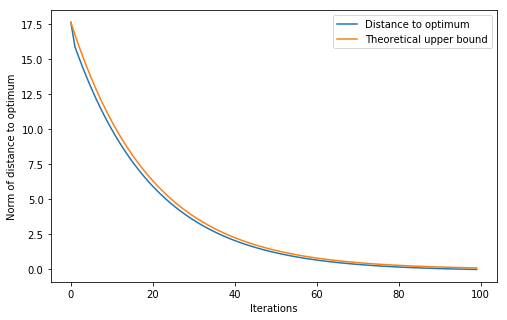

In [49]:
value_iteration()

Optimal policy is [1 1 2]


array([1, 1, 2])

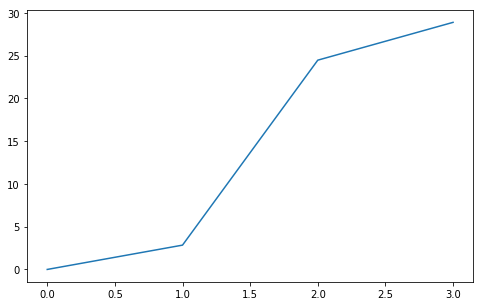

In [53]:
value_iteration()
policy_iteration()

In [17]:
%timeit value_iteration(output=False)

2.18 ms ± 83.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit policy_iteration(output=False)

212 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
